# Exercise 5.3
_______

In [26]:
import numpy as np
import scipy.stats, scipy.special
from matplotlib import pyplot as plt

# plot preset
FONTSIZE = 12
plt.rcParams['font.size'] = FONTSIZE
plt.rcParams['xtick.labelsize'] = FONTSIZE
plt.rcParams['ytick.labelsize'] = FONTSIZE
plt.rcParams['legend.fontsize'] = FONTSIZE
plt.rcParams['axes.titlesize'] = FONTSIZE
plt.rcParams['axes.labelsize'] = FONTSIZE
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['figure.figsize'] = (8, 5)


We draw n=120 elements from an exponential distribution where $\tau$ itself is drawn from a Gamma distribution with $a=4, b=2$ and repeat this $N=10000$ times. In b) we then check for how many of the $N$ samples $\tau$ actually lies within the $90$% confidence intervall (see slide 359).
In order to not have to save all the samples, it makes sense to calculate the necessary information for exercise b) and c) already when we loop over the sample calculation!
Remeber that in the lexture the Gamma distribution was defined as and compare that this is consistent with your implementation:
$$Ga(x;a,b)=\frac{x^{a-1}e^{-x/b}}{b^a\Gamma(a)}$$


In [27]:
# setup 
N = 10000
n = 120
a = 4
b = 2

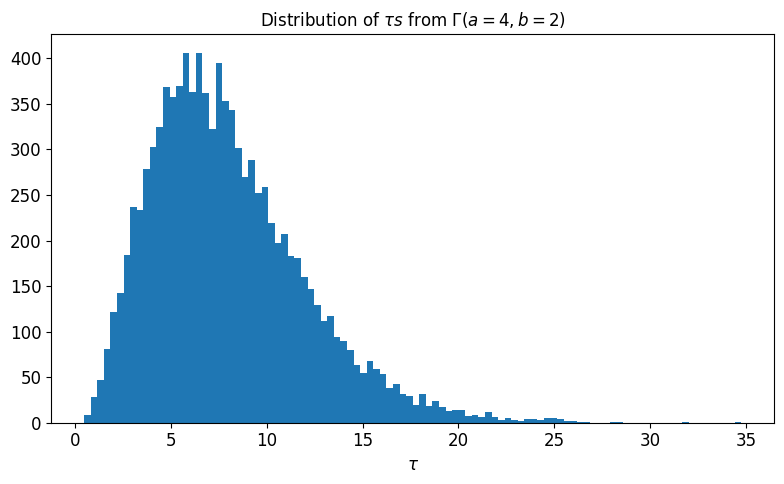

In [28]:
# we can sample the N taus already before drawing the N samples and plot them in a histogram
myGamma = scipy.stats.gamma(a = a, loc=0, scale = b)
sampled_taus = myGamma.rvs(N)

plt.hist(sampled_taus,bins=100)
plt.xlabel(r'$\tau$')
plt.title(r"Distribution of $\tau s$ from $\Gamma(a=4,b=2)$")
plt.show()

In [29]:
# now generate the N samples from the exponential distribution from your array of taus and calculate the necessary quantities for b) and c)!

taus_in_ci = 0                      # counter for the times where the true tau lies in the 90% confidence interval
differences = np.zeros(N)   # difference of the sample mean to the true value of tau

for i in range(N):
    #sampling the exponential distribution
    myExp = scipy.stats.expon(scale = sampled_taus[i])
    ltau = sampled_taus[i]
    sample_exp = myExp.rvs(n)
    
    mean = np.mean(sample_exp)
    differences[i] = mean - sampled_taus[i]
    
    #calculating the boundaries
    a=0.1
    myGamma2 = scipy.stats.gamma(a = n, loc = 0, scale = 1/n)
    b_d = mean/myGamma2.ppf(1-a/2)
    b_u = mean/myGamma2.ppf(a/2)

    if b_u > sampled_taus[i] and sampled_taus[i] > b_d:
        taus_in_ci += 1       
        
print(b_d)
print(b_u)
print("Number of taus inside confidence interval: ",taus_in_ci, "(" , 100 * taus_in_ci / (N), "%)" )

6.738585490684412
9.103820812329111
Number of taus inside confidence interval:  9043 ( 90.43 %)


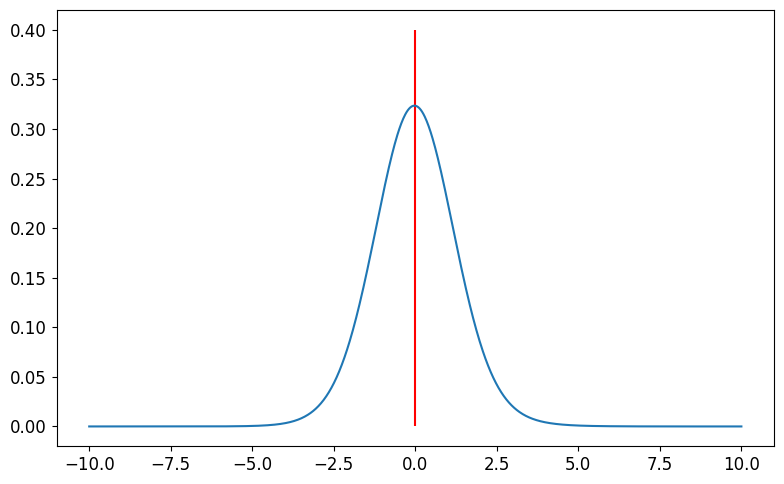

In [30]:
from sklearn.neighbors import KernelDensity
res = 1000
m = KernelDensity(kernel="gaussian")
m.fit(differences[:, np.newaxis])
x = np.linspace(-10,10, res)[:,np.newaxis]
d = np.exp(m.score_samples(x))
plt.vlines([0],0,.4, color="red")
plt.plot(x,d)

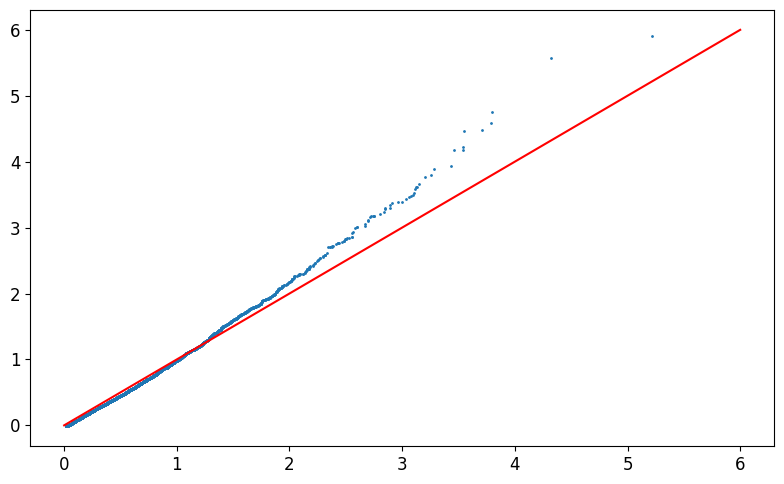

In [46]:
# Use the differences array from above and choose a graphical presentation to show that the values are symmetrically distributed around 0
dsorted = np.sort(differences)
[dlm, dhm] = np.split(dsorted,2)
dlm = np.sort(-dlm)
dhm = np.sort(dhm)
plt.scatter(dlm,dhm, s=1)
plt.xlabel("negatives")
plt.ylabel("positives")
plt.plot([0,6],[0,6],c="red")